In [8]:
# classification algorithms- Diabetes dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

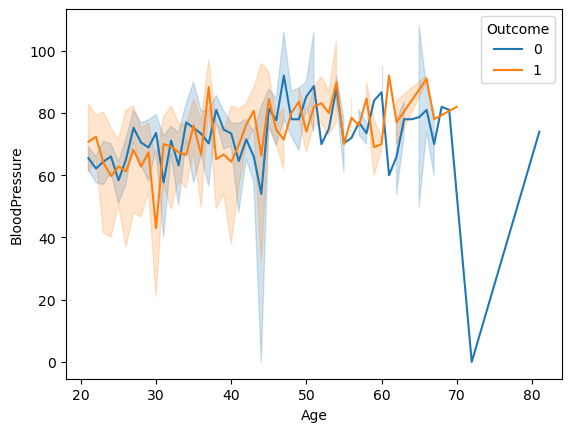

In [35]:
# EDA
sns.lineplot(x='Age',y='BloodPressure',data=data,hue='Outcome')

# blood pressure is low in between the range 70-80

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

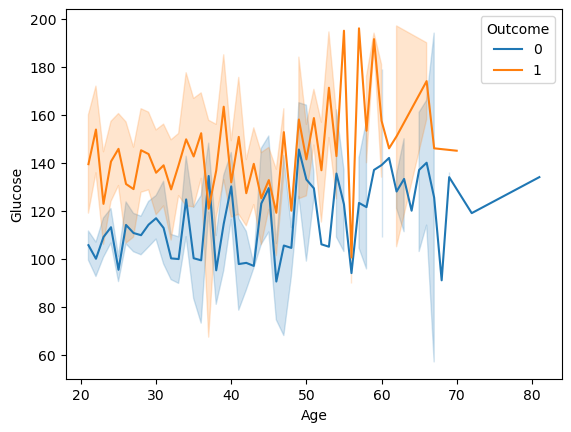

In [36]:
sns.lineplot(x='Age',y='Glucose',data=data,hue='Outcome')
# glucose is high in between the age range 50-70

<AxesSubplot:xlabel='BloodPressure'>

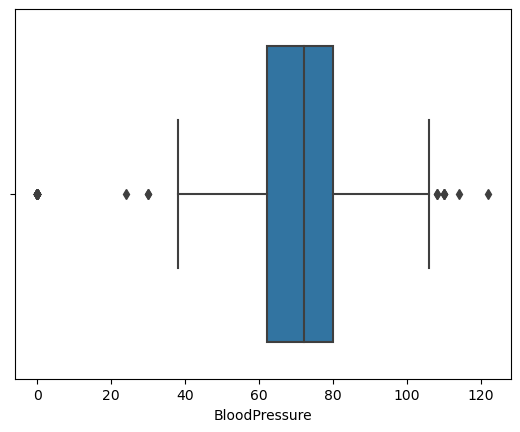

In [39]:
sns.boxplot(x='BloodPressure',data=data)
# 7-outleyers in blood pressure data

<AxesSubplot:xlabel='Insulin'>

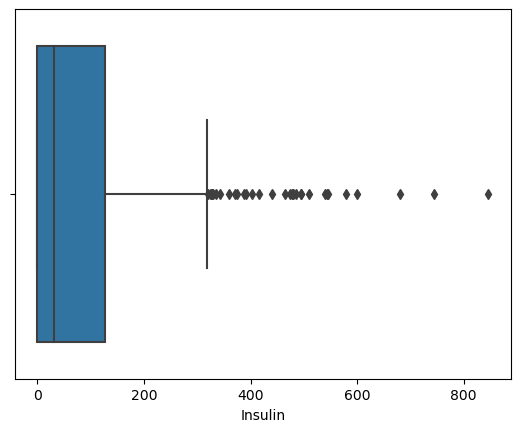

In [42]:
sns.boxplot(x='Insulin',data=data)
# number of outleyers in Insuline is grater than 10

<AxesSubplot:xlabel='Glucose'>

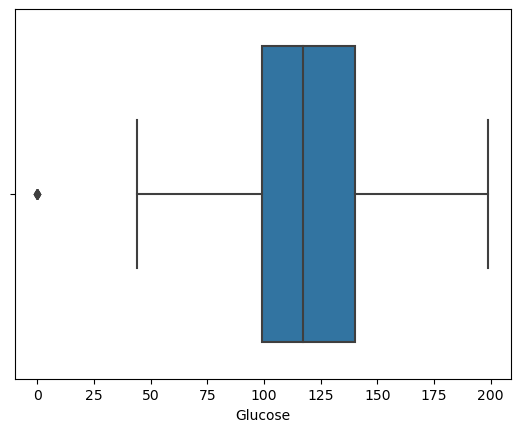

In [43]:
sns.boxplot(x='Glucose',data=data)
#  there is only one outleyar in Glucose

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

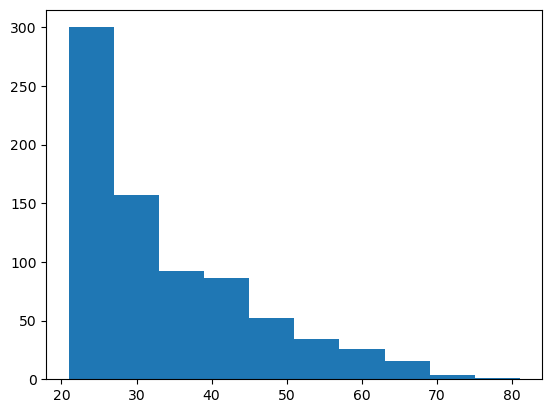

In [45]:
plt.hist(x='Age',data=data)
# age in between 20-30 is grater count in the dataset

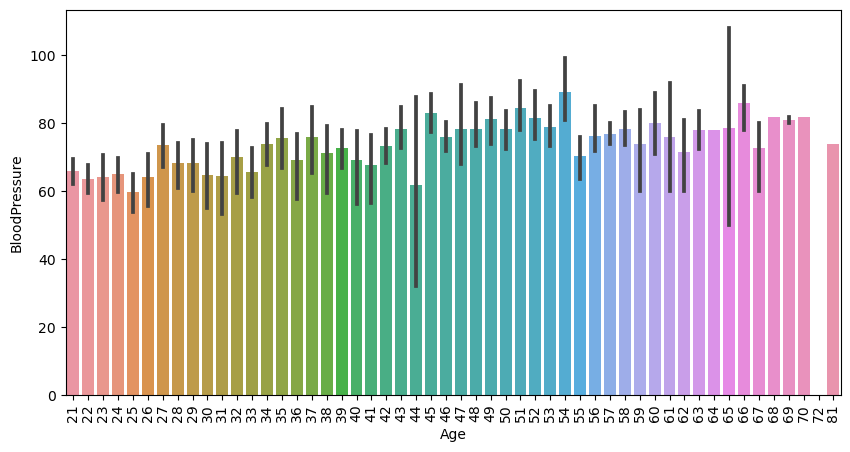

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x='Age',y='BloodPressure',data=data)
plt.xticks(rotation=90)
plt.show()

In [11]:
x=data.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y=data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<AxesSubplot:>

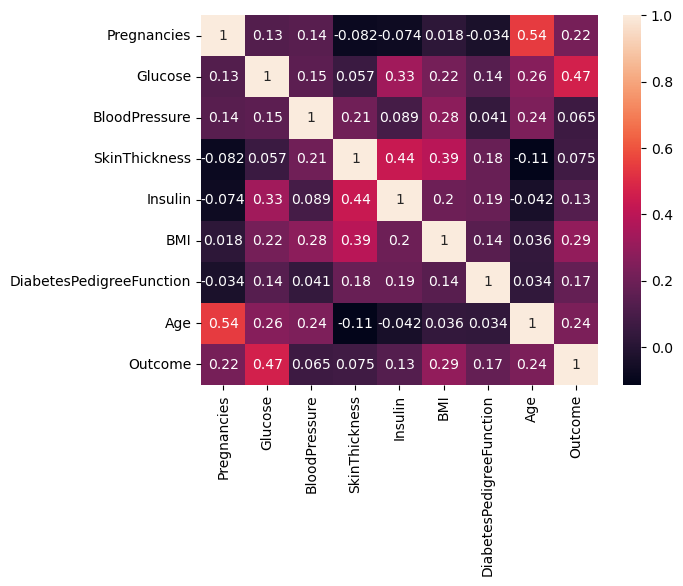

In [34]:
sns.heatmap(data.corr(),annot=True)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [16]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model0=LogisticRegression()
model0.fit(x_train,y_train)
y_predict=model0.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

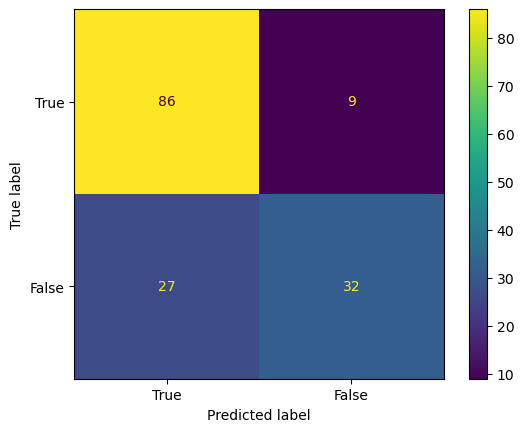

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
con=confusion_matrix(y_test,y_predict)
mat=ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[True,False])
mat.plot()
plt.show()

In [21]:
# classification report by using logistic regression
from sklearn.metrics import classification_report
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [18]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train,y_train)
y_predict1=model1.predict(x_test)
y_predict1

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

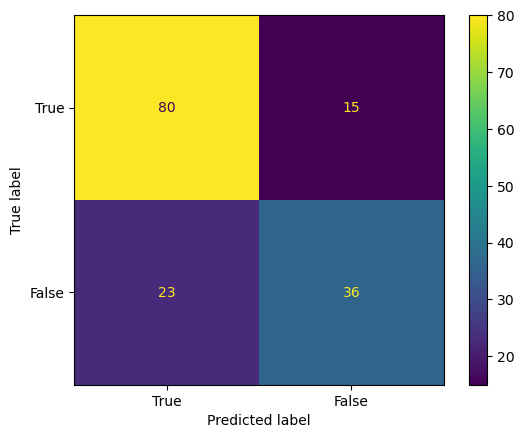

In [19]:
con1=confusion_matrix(y_test,y_predict1)
mat1=ConfusionMatrixDisplay(confusion_matrix=con1,display_labels=[True,False])
mat1.plot()
plt.show()

In [22]:
# classification report by using KNN
from sklearn.metrics import classification_report
report1=classification_report(y_test,y_predict1)
print(report1)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.71      0.61      0.65        59

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [24]:
# Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_predict2=model2.predict(x_test)
y_predict2

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1],
      dtype=int64)

[]

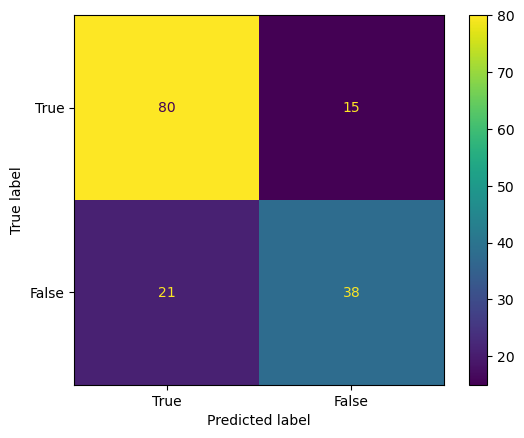

In [25]:
con2=confusion_matrix(y_test,y_predict2)
mat2=ConfusionMatrixDisplay(confusion_matrix=con2,display_labels=[True,False])
mat2.plot()
plt.plot()

In [26]:
# classification report using decision trees
report2=classification_report(y_test,y_predict2)
print(report2)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        95
           1       0.72      0.64      0.68        59

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154



In [30]:
# random forest
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=5)
model3.fit(x_train,y_train)
y_predict3=model3.predict(x_test)
y_predict3

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

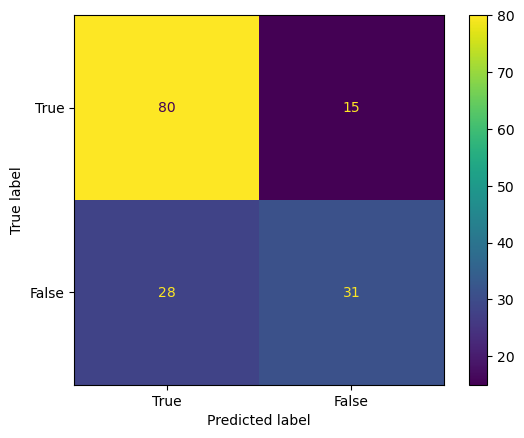

In [31]:
con3=confusion_matrix(y_test,y_predict3)
mat3=ConfusionMatrixDisplay(confusion_matrix=con3,display_labels=[True,False])
mat3.plot()
plt.show()


In [32]:
# class
report3=classification_report(y_test,y_predict3)
print(report3)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        95
           1       0.67      0.53      0.59        59

    accuracy                           0.72       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.72      0.71       154



In [ ]:
# prediction accuracy is higher for logistic and decision tree algorithm